# Preprocessing

In [300]:
# Librerie per il preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [301]:
df_originale = pd.read_csv('Dataset eye tracker.tsv', delimiter='\t')     # Lettura del dataset sull'eye tracker
df = df_originale.copy()                                                  # Copia del dataset, utilizzata per il preprocessing
df = df.replace(',', '.', regex=True)       # Sostituzione delle virgole nel dataset con punti, per permettere la lettura dei valori float

In [302]:
df.shape                      # Visualizzazione del numero di righe e colonne del dataset

(84, 30)

In [303]:
df.info(verbose=True)         # Visualizzazione delle informazioni sul dataset, sulle proprie colonne e sui relativi valori

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 30 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Task                                             84 non-null     object 
 1   Participant                                      84 non-null     object 
 2   TOI                                              84 non-null     object 
 3   Interval                                         84 non-null     int64  
 4   Media                                            84 non-null     object 
 5   Duration_of_interval                             84 non-null     int64  
 6   Start_of_interval                                84 non-null     int64  
 7   Number_of_Events.Logged_live_Event               84 non-null     int64  
 8   Time_to_first_Event.Logged_live_Event            0 non-null      float64
 9   Last_AOI_viewed                   

In [304]:
df.head()                     # Visualizzazione delle prime cinque righe del dataset

,Task,Participant,TOI,Interval,Media,Duration_of_interval,Start_of_interval,Number_of_Events.Logged_live_Event,Time_to_first_Event.Logged_live_Event,Last_AOI_viewed,...,Standard_deviation_of_peak_velocity_of_saccades,Average_amplitude_of_saccades,Minimum_amplitude_of_saccades,Maximum_amplitude_of_saccades,Total_amplitude_of_saccades,Time_to_first_saccade,Direction_of_first_saccade,Peak_velocity_of_first_saccade,Average_velocity_of_first_saccade,Amplitude_of_first_saccade
0,Task 1,Alessia,Entire Recording,1,scenevideo,18760,0,0,NaN,NaN,...,207.09,6.79,2,23.8,88.32,2060,4.17,31.36,31.36,4.43
1,Task 2,Alessia,Entire Recording,1,scenevideo,35230,0,0,NaN,NaN,...,235.31,6.87,1.02,22.61,130.47,236,300.27,71.24,66.02,3.43
2,Task 3,Alessia,Entire Recording,1,scenevideo,14150,0,0,NaN,NaN,...,169.84,7.14,0.69,22.31,228.55,155,85.4,564.93,347.76,20.58
3,Task 4,Alessia,Entire Recording,1,scenevideo,36311,0,0,NaN,NaN,...,118.35,5.35,0.73,10.63,149.81,116,277.58,227.08,227.08,4.61
4,Task 5,Alessia,Entire Recording,1,scenevideo,48172,0,0,NaN,NaN,...,215.83,8.02,0.83,23.31,224.55,295,209.12,31.53,31.53,1.31


In [305]:
colonne_object_originali = df.select_dtypes(include=['object']).columns.tolist()                                # Selezione delle colonne di tipo 'object'
colonne_da_escludere = ['Task', 'Participant']                                                                  # Esclusione delle colonne 'Task' e 'Participant'
colonne_object = [colonna for colonna in colonne_object_originali if colonna not in colonne_da_escludere]       # Filtraggio delle colonne 'object' escludendo quelle specificate
colonne_eliminate = []                                                                                          # Creazione elenco delle colonne da eliminare

# Visualizzazione dell'elenco originale delle colonne 'object'
print("Colonne 'object' iniziali:")
for i in range(len(colonne_object_originali)):
    print("-",colonne_object_originali[i])

# Conversione delle colonne e gestione degli errori
for colonna in colonne_object:
    try:
        df[colonna] = df[colonna].astype(float)       # Conversione delle colonne in float
    except ValueError:
        colonne_eliminate.append(colonna)             # Aggiunta della colonna tra quelle da eliminare
        df = df.drop(colonna, axis=1)                 # Eliminazione della colonna

# Visualizzazione dell'elenco delle colonne eliminate
print("\nColonne eliminate:")
print(colonne_eliminate)

colonne_object_dopo_conversione = df.select_dtypes(include=['object']).columns.tolist()       # Creazione dell'elenco delle colonne aventi ancora tipo 'object'

# Visualizzazione dell'elenco finale delle colonne 'object' dopo la conversione
print("\nColonne 'object' dopo la conversione:")
print(colonne_object_dopo_conversione)


Colonne 'object' iniziali:
- Task
- Participant
- TOI
- Media
- Average_whole-fixation_pupil_diameter
- Average_peak_velocity_of_saccades
- Minimum_peak_velocity_of_saccades
- Maximum_peak_velocity_of_saccades
- Standard_deviation_of_peak_velocity_of_saccades
- Average_amplitude_of_saccades
- Minimum_amplitude_of_saccades
- Maximum_amplitude_of_saccades
- Total_amplitude_of_saccades
- Direction_of_first_saccade
- Peak_velocity_of_first_saccade
- Average_velocity_of_first_saccade
- Amplitude_of_first_saccade

Colonne eliminate:
['TOI', 'Media']

Colonne 'object' dopo la conversione:
['Task', 'Participant']


In [306]:
valori_mancanti = df.isnull().sum()       # Controllo della presenza di valori mancanti nelle colonne nel dataset e ne specifica il numero
colonne_con_valori_mancanti = valori_mancanti[valori_mancanti > 0]      # Filtraggio delle sole colonne con valori mancanti

# Visualizzazione dell'elenco dei valori mancanti totali per ogni colonna
if not colonne_con_valori_mancanti.empty:
    print("Elenco delle colonne contenenti valori mancanti e totale valori mancanti:")
    for colonna, contatore in colonne_con_valori_mancanti.items():
        print(f"- {colonna}: {contatore}")
else:
    print("Nessun valore mancante trovato")

colonne_con_tutti_valori_mancanti = df.columns[df.isnull().all()]       # Filtraggio delle sole colonne con tutti valori mancanti

# Eliminazione delle colonne con tutti valori mancanti dal DataFrame
if not colonne_con_tutti_valori_mancanti.empty:
    df = df.drop(columns=colonne_con_tutti_valori_mancanti, axis=1)
    print("\nColonne con tutti valori mancanti eliminate")
else:
    print("\nNessuna colonna con tutti valori mancanti trovata")

colonne_con_tutti_zero = df.columns[(df == 0).all()]                    # Filtraggio delle sole colonne con tutti valori 0

# Visualizzazione dell'elenco delle colonne con tutti valori 0 ed eliminazione delle stesse colonne
if not colonne_con_tutti_zero.empty:
    print("\nElenco delle colonne con tutti valori 0:")
    for colonna in colonne_con_tutti_zero:
        print(f"- {colonna}")
    df = df.drop(columns=colonne_con_tutti_zero, axis=1)
    print("\nColonne con tutti valori 0 eliminate")
else:
    print("\nNessuna colonna con tutti valori 0 trovata")

Elenco delle colonne contenenti valori mancanti e totale valori mancanti:
- Time_to_first_Event.Logged_live_Event: 84
- Last_AOI_viewed: 84
- AOI_at_interval_end: 84

Colonne con tutti valori mancanti eliminate

Elenco delle colonne con tutti valori 0:
- Start_of_interval
- Number_of_Events.Logged_live_Event

Colonne con tutti valori 0 eliminate


In [307]:
colonne_con_valori_uguali = df.columns[df.nunique() == 1]       # Filtraggio delle sole colonne con tutti valori uguali

# Visualizzazione dell'elenco delle colonne con tutti valori uguali ed eliminazione delle stesse colonne
if not colonne_con_valori_uguali.empty:
    print("Elenco e contenuto delle colonne con valori uguali:")
    for colonna in colonne_con_valori_uguali:
        valore_unico = df[colonna].unique()[0]
        print(f"-'{colonna}' --> Contenuto: {valore_unico}")
        df = df.drop(colonna, axis=1)
        print("Colonna '", colonna, "' eliminata", sep="")
else:
    print("Nessuna colonna con tutti valori uguali trovata")

Elenco e contenuto delle colonne con valori uguali:
-'Interval' --> Contenuto: 1
Colonna 'Interval' eliminata


In [308]:
df.shape                      # Visualizzazione del numero di righe e colonne del dataset dopo l'eliminazione delle colonne con valori mancanti

(84, 22)

In [309]:
df.info(verbose=True)         # Visualizzazione delle informazioni sul dataset, sulle proprie colonne e sui relativi valori dopo l'eliminazione delle colonne con valori mancanti

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 22 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Task                                             84 non-null     object 
 1   Participant                                      84 non-null     object 
 2   Duration_of_interval                             84 non-null     int64  
 3   Total_duration_of_whole_fixations                84 non-null     int64  
 4   Average_duration_of_whole_fixations              84 non-null     int64  
 5   Number_of_whole_fixations                        84 non-null     int64  
 6   Duration_of_first_whole_fixation                 84 non-null     int64  
 7   Average_whole-fixation_pupil_diameter            84 non-null     float64
 8   Number_of_saccades                               84 non-null     int64  
 9   Average_peak_velocity_of_saccades 

In [310]:
df.head()                     # Visualizzazione delle prime cinque righe del dataset dopo l'eliminazione delle colonne con valori mancanti

,Task,Participant,Duration_of_interval,Total_duration_of_whole_fixations,Average_duration_of_whole_fixations,Number_of_whole_fixations,Duration_of_first_whole_fixation,Average_whole-fixation_pupil_diameter,Number_of_saccades,Average_peak_velocity_of_saccades,...,Standard_deviation_of_peak_velocity_of_saccades,Average_amplitude_of_saccades,Minimum_amplitude_of_saccades,Maximum_amplitude_of_saccades,Total_amplitude_of_saccades,Time_to_first_saccade,Direction_of_first_saccade,Peak_velocity_of_first_saccade,Average_velocity_of_first_saccade,Amplitude_of_first_saccade
0,Task 1,Alessia,18760,15027,884,17,1262,3.24215,13,208.92,...,207.09,6.79,2.00,23.80,88.32,2060,4.17,31.36,31.36,4.43
1,Task 2,Alessia,35230,33320,1333,25,140,3.15272,19,218.53,...,235.31,6.87,1.02,22.61,130.47,236,300.27,71.24,66.02,3.43
2,Task 3,Alessia,14150,11421,317,36,120,3.35347,32,221.49,...,169.84,7.14,0.69,22.31,228.55,155,85.40,564.93,347.76,20.58
3,Task 4,Alessia,36311,33981,971,35,361,3.09314,28,177.17,...,118.35,5.35,0.73,10.63,149.81,116,277.58,227.08,227.08,4.61
4,Task 5,Alessia,48172,44380,1432,31,120,3.10648,28,239.83,...,215.83,8.02,0.83,23.31,224.55,295,209.12,31.53,31.53,1.31


In [311]:
label_encoder = LabelEncoder()                                              # Creazione di un oggetto LabelEncoder
df['Participant'] = label_encoder.fit_transform(df['Participant']) + 1      # Sostituzione dei valori nella colonna target con cifre da 1 a 4
df['Task'] = (df.groupby('Participant').cumcount() % 21) + 1                # Sostituzione dei valori nella colonna dei task con cifre da 1 a 21 in modo ciclico
print(df[['Task', 'Participant']])                                          # Visualizzazione delle prime due colonne del dataset

    Task  Participant
0      1            1
1      2            1
2      3            1
3      4            1
4      5            1
..   ...          ...
79    17            4
80    18            4
81    19            4
82    20            4
83    21            4

[84 rows x 2 columns]


In [312]:
X = df.drop('Participant', axis=1)      # Assegnazione a X dell'intero dataset a eccezione della colonna target
y = df['Participant']                   # Assegnazione a y della colonna target del dataset

Text(0.5, 1.0, 'Distribuzione delle classi\nAlessia          Filippo          Matteo          Silvia')

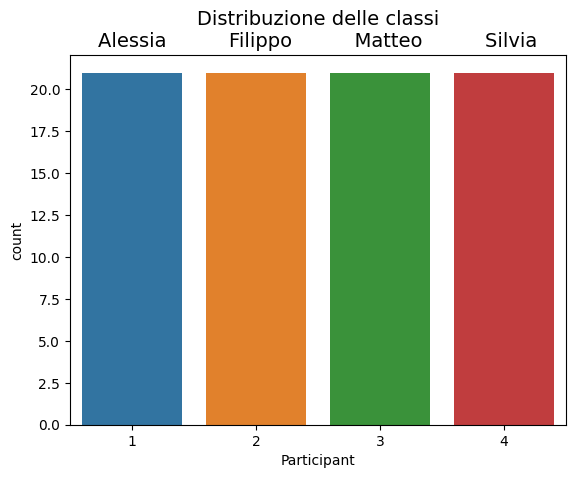

In [313]:
# Realizzazione di un grafico contenente la distribuzione dei valori della colonna target del dataset nelle quattro classi considerate
sns.countplot(x=y)
plt.title('Distribuzione delle classi\nAlessia          Filippo          Matteo          Silvia', fontsize=14)

In [314]:
df.shape                      # Visualizzazione del numero di righe e colonne del dataset alla fine della fase di preprocessing

(84, 22)

In [315]:
df.info(verbose=True)         # Visualizzazione delle informazioni sul dataset, sulle proprie colonne e sui relativi valori alla fine della fase di preprocessing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 22 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Task                                             84 non-null     int64  
 1   Participant                                      84 non-null     int64  
 2   Duration_of_interval                             84 non-null     int64  
 3   Total_duration_of_whole_fixations                84 non-null     int64  
 4   Average_duration_of_whole_fixations              84 non-null     int64  
 5   Number_of_whole_fixations                        84 non-null     int64  
 6   Duration_of_first_whole_fixation                 84 non-null     int64  
 7   Average_whole-fixation_pupil_diameter            84 non-null     float64
 8   Number_of_saccades                               84 non-null     int64  
 9   Average_peak_velocity_of_saccades 

In [316]:
df.head()                     # Visualizzazione delle prime cinque righe del dataset alla fine della fase di preprocessing

,Task,Participant,Duration_of_interval,Total_duration_of_whole_fixations,Average_duration_of_whole_fixations,Number_of_whole_fixations,Duration_of_first_whole_fixation,Average_whole-fixation_pupil_diameter,Number_of_saccades,Average_peak_velocity_of_saccades,...,Standard_deviation_of_peak_velocity_of_saccades,Average_amplitude_of_saccades,Minimum_amplitude_of_saccades,Maximum_amplitude_of_saccades,Total_amplitude_of_saccades,Time_to_first_saccade,Direction_of_first_saccade,Peak_velocity_of_first_saccade,Average_velocity_of_first_saccade,Amplitude_of_first_saccade
0,1,1,18760,15027,884,17,1262,3.24215,13,208.92,...,207.09,6.79,2.00,23.80,88.32,2060,4.17,31.36,31.36,4.43
1,2,1,35230,33320,1333,25,140,3.15272,19,218.53,...,235.31,6.87,1.02,22.61,130.47,236,300.27,71.24,66.02,3.43
2,3,1,14150,11421,317,36,120,3.35347,32,221.49,...,169.84,7.14,0.69,22.31,228.55,155,85.40,564.93,347.76,20.58
3,4,1,36311,33981,971,35,361,3.09314,28,177.17,...,118.35,5.35,0.73,10.63,149.81,116,277.58,227.08,227.08,4.61
4,5,1,48172,44380,1432,31,120,3.10648,28,239.83,...,215.83,8.02,0.83,23.31,224.55,295,209.12,31.53,31.53,1.31


In [317]:
# Applicazione del processo di PCA
pcaKM = PCA(n_components=4)
pcaKM.fit(X)
reducedKM_data = pcaKM.transform(X)

# Boosting - Classificazione con AdaBoostClassifier

In [318]:
# Librerie per la valutazione dell'apprendimento tramite gli algoritmi di boosting
import numpy as np
from itertools import cycle
from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, roc_curve
from sklearn.model_selection import cross_val_predict, cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import label_binarize

In [319]:
from sklearn.ensemble import AdaBoostClassifier             # Libreria per l'utilizzo dell'algoritmo di boosting AdaBoostClassifier

In [320]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=123)     # Esecuzione del train_test_split con test_size al 20%

### Grid search

In [321]:
parametri_abc = {'learning_rate': [0.001, 0.01, 0.1, 1], 'n_estimators': [50, 100, 500, 1000]}                # Iperparametri di cui effettuare la grid search
grid_search_abc = GridSearchCV(AdaBoostClassifier(), parametri_abc, cv=6, error_score='raise')                # Esecuzione della grid search con AdaBoostClassifier
grid_search_abc.fit(X_train, y_train)                     # Svolgimento del fitting della grid search sui dati di train per trovare la migliore combinazione di iperparametri
parametri_migliori_abc = grid_search_abc.best_params_     # Salvataggio dei migliori iperparametri per il processo di fitting effettuato sopra
print('Migliore combinazione di iperparametri per AdaBoostClassifier:', grid_search_abc.best_params_)         # Visualizzazione della migliore combinazione di iperparametri
print('Migliore precisione in fase di grid search per AdaBoostClassifier:', grid_search_abc.best_score_)      # Visualizzazione della precisione raggiunta con tale combinazione

Migliore combinazione di iperparametri per AdaBoostClassifier: {'learning_rate': 0.1, 'n_estimators': 1000}
Migliore precisione in fase di grid search per AdaBoostClassifier: 0.5227272727272727


### AdaBoostClassifier con train_test_split

In [322]:
modello_abc = AdaBoostClassifier(**parametri_migliori_abc)        # Utilizzo dell'algoritmo con i migliori iperparametri
modello_abc.fit(X_train, y_train)                                 # Svolgimento del fitting del precedente algoritmo sui dati di train
y_pred_abc_tts = modello_abc.predict(X_test)                      # Calcolo della predizione effettuata dall'algoritmo sui dati di test della X
precisione_abc_tts = accuracy_score(y_test, y_pred_abc_tts)       # Calcolo della precisione dell'algoritmo sui dati di test della y
print('Precisione con train_test_split:', precisione_abc_tts)     # Visualizzazione della precisione dell'algoritmo con train_test_split

Precisione con train_test_split: 0.6470588235294118


### AdaBoostClassifier con cross-validation

In [323]:
y_pred_abc_cv = cross_val_predict(modello_abc, X, y, cv=6)          # Calcolo della predizione effettuata dall'algoritmo sui dati della X
precisione_abc_cv = accuracy_score(y, y_pred_abc_cv)                # Calcolo della precisione dell'algoritmo con X e y divisi in 6 gruppi da 14 righe di dati l'uno
print('Precisione con cross-validation:', precisione_abc_cv)        # Visualizzazione della precisione dell'algoritmo con cross-validation

Precisione con cross-validation: 0.47619047619047616


### AdaBoostClassifier con train_test_split e cross-validation innestata

In [324]:
y_pred_abc_tts_cv = cross_val_predict(modello_abc, X_train, y_train, cv=6)                          # Calcolo della predizione effettuata dall'algoritmo sui dati della X
precisione_abc_tts_cv = accuracy_score(y_train, y_pred_abc_tts_cv)                                  # Calcolo della precisione dell'algoritmo con X e y divisi in 6 gruppi da 14 righe di dati l'uno
print('Precisione con train_test_split e cross-validation innestata:', precisione_abc_tts_cv)       # Visualizzazione della precisione dell'algoritmo con cross-validation

Precisione con train_test_split e cross-validation innestata: 0.5223880597014925


### Matrici di confusione

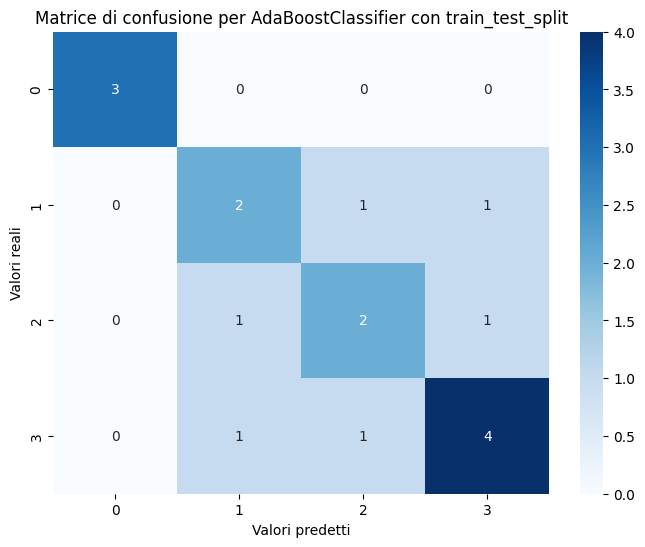

In [325]:
# Creazione e visualizzazione della matrice di confusione per l'algoritmo di boosting AdaBoostClassifier con train_test_split
matrice_di_confusione_abc_tts = confusion_matrix(y_test, y_pred_abc_tts)            # Realizzazione della matrice di confusione confrontando i test e le predizioni sulla y
plt.figure(figsize=(8,6))                 # Realizzazione del grafico che conterrà la matrice di confusione
sns.heatmap(matrice_di_confusione_abc_tts, annot=True, fmt='d', cmap='Blues')       # Inserimento della matrice di confusione nel grafico
plt.title('Matrice di confusione per AdaBoostClassifier con train_test_split')      # Inserimento del titolo del grafico
plt.xlabel('Valori predetti')             # Inserimento dell'etichetta per i valori sull'asse x del grafico
plt.ylabel('Valori reali')                # Inserimento dell'etichetta per i valori sull'asse y del grafico
plt.show()                                # Visualizzazione della matrice di confusione come grafico

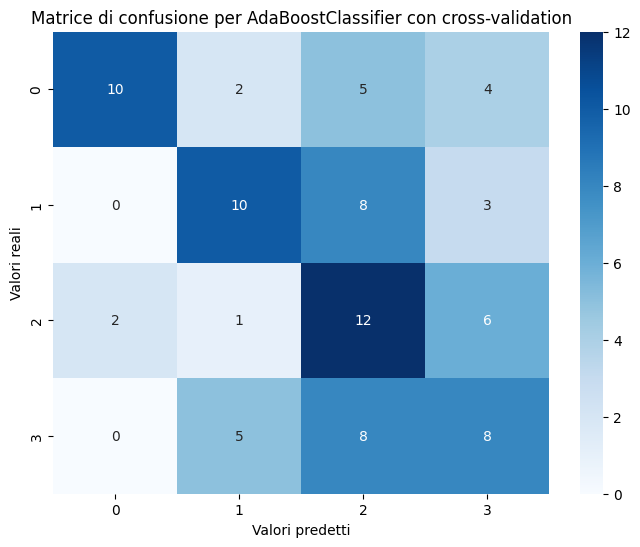

In [326]:
# Creazione e visualizzazione della matrice di confusione per l'algoritmo di boosting AdaBoostClassifier con cross-validation
matrice_di_confusione_abc_cv = confusion_matrix(y, y_pred_abc_cv)                   # Realizzazione della matrice di confusione confrontando i test e le predizioni sulla y
plt.figure(figsize=(8,6))                 # Realizzazione del grafico che conterrà la matrice di confusione
sns.heatmap(matrice_di_confusione_abc_cv, annot=True, fmt='d', cmap='Blues')        # Inserimento della matrice di confusione nel grafico
plt.title('Matrice di confusione per AdaBoostClassifier con cross-validation')      # Inserimento del titolo del grafico
plt.xlabel('Valori predetti')             # Inserimento dell'etichetta per i valori sull'asse x del grafico
plt.ylabel('Valori reali')                # Inserimento dell'etichetta per i valori sull'asse y del grafico
plt.show()                                # Visualizzazione della matrice di confusione come grafico

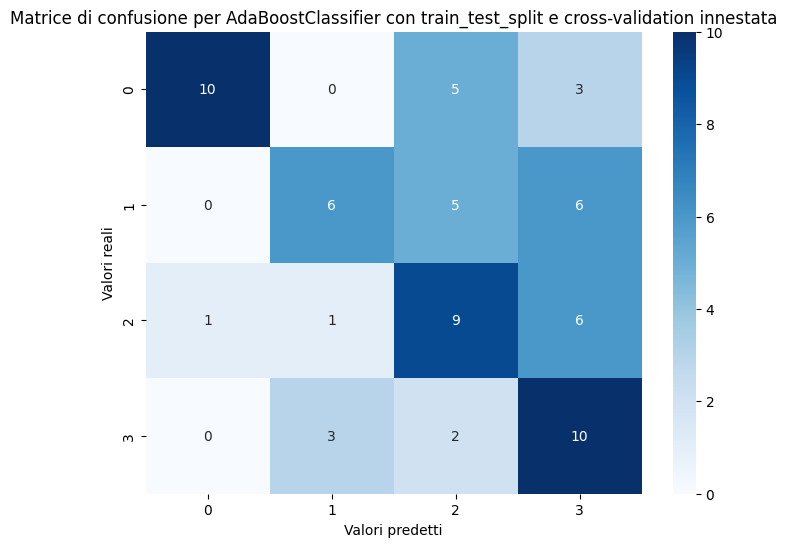

In [327]:
# Creazione e visualizzazione della matrice di confusione per l'algoritmo di boosting AdaBoostClassifier con train_test_split e cross-validation innestata
matrice_di_confusione_abc_tts_cv = confusion_matrix(y_train, y_pred_abc_tts_cv)     # Realizzazione della matrice di confusione confrontando i test e le predizioni sulla y
plt.figure(figsize=(8,6))                 # Realizzazione del grafico che conterrà la matrice di confusione
sns.heatmap(matrice_di_confusione_abc_tts_cv, annot=True, fmt='d', cmap='Blues')    # Inserimento della matrice di confusione nel grafico
plt.title('Matrice di confusione per AdaBoostClassifier con train_test_split e cross-validation innestata')       # Inserimento del titolo del grafico
plt.xlabel('Valori predetti')             # Inserimento dell'etichetta per i valori sull'asse x del grafico
plt.ylabel('Valori reali')                # Inserimento dell'etichetta per i valori sull'asse y del grafico
plt.show()                                # Visualizzazione della matrice di confusione come grafico

### Deviazioni standard

In [328]:
# Visualizzazione delle deviazioni standard per l'algoritmo di boosting AdaBoostClassifier
print('Deviazione standard per AdaBoostClassifier con train_test_split:', np.std(matrice_di_confusione_abc_tts))
print('Deviazione standard per AdaBoostClassifier con cross-validation:', np.std(matrice_di_confusione_abc_cv))
print('Deviazione standard per AdaBoostClassifier con train_test_split e cross-validation innestata:', np.std(matrice_di_confusione_abc_tts_cv))

Deviazione standard per AdaBoostClassifier con train_test_split: 1.1439378261076953
Deviazione standard per AdaBoostClassifier con cross-validation: 3.665719574653795
Deviazione standard per AdaBoostClassifier con train_test_split e cross-validation innestata: 3.376735664810025


###ROC curve

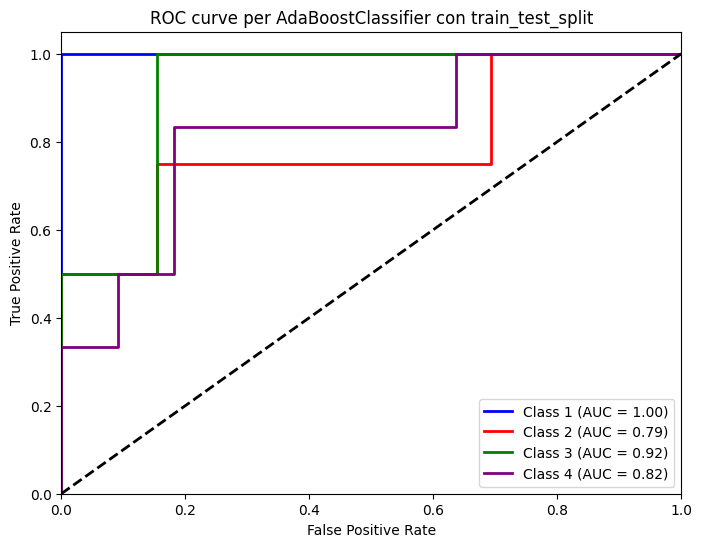

In [329]:
y_test_binarizzato = label_binarize(y_test, classes=[1, 2, 3, 4])
fpr = dict()
tpr = dict()
roc_auc = dict()
y_pred = modello_abc.predict_proba(X_test)
numero_classi = y_test_binarizzato.shape[1]
for i in range(numero_classi):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarizzato[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure(figsize=(8, 6))
colori = cycle(['blue', 'red', 'green', 'purple'])
for i, colore in zip(range(numero_classi), colori):
    plt.plot(fpr[i], tpr[i], color=colore, lw=2, label=f'Class {i + 1} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve per AdaBoostClassifier con train_test_split')
plt.legend(loc="lower right")
plt.show()

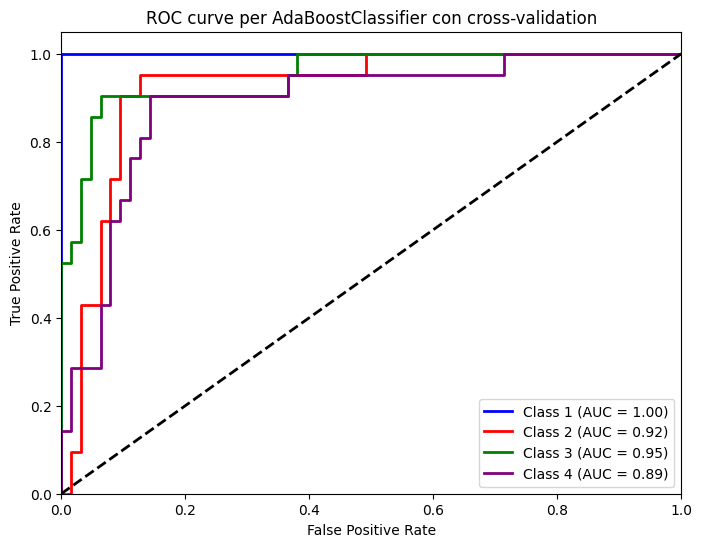

In [330]:
y_binarizzato = label_binarize(y, classes=[1, 2, 3, 4])
fpr = dict()
tpr = dict()
roc_auc = dict()
y_pred = modello_abc.predict_proba(X)
numero_classi = y_binarizzato.shape[1]
for i in range(numero_classi):
    fpr[i], tpr[i], _ = roc_curve(y_binarizzato[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure(figsize=(8, 6))
colori = cycle(['blue', 'red', 'green', 'purple'])
for i, colore in zip(range(numero_classi), colori):
    plt.plot(fpr[i], tpr[i], color=colore, lw=2, label=f'Class {i + 1} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve per AdaBoostClassifier con cross-validation')
plt.legend(loc="lower right")
plt.show()

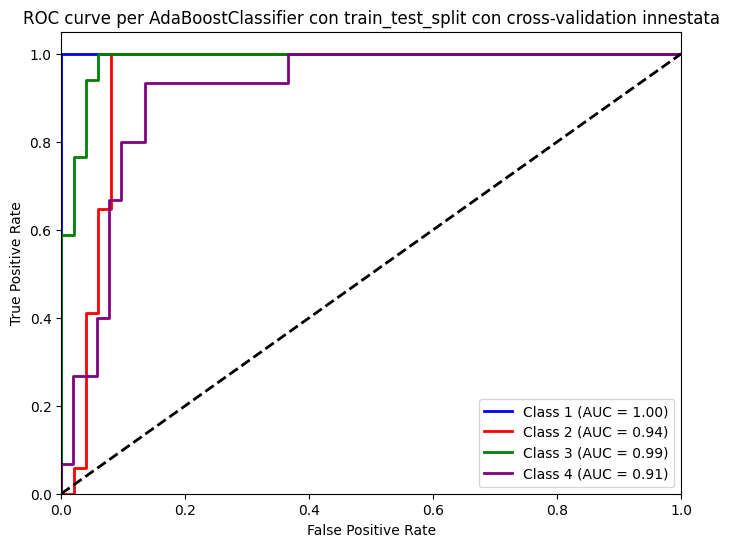

In [331]:
y_train_binarizzato = label_binarize(y_train, classes=[1, 2, 3, 4])
fpr = dict()
tpr = dict()
roc_auc = dict()
y_pred = modello_abc.predict_proba(X_train)
numero_classi = y_train_binarizzato.shape[1]
for i in range(numero_classi):
    fpr[i], tpr[i], _ = roc_curve(y_train_binarizzato[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure(figsize=(8, 6))
colori = cycle(['blue', 'red', 'green', 'purple'])
for i, colore in zip(range(numero_classi), colori):
    plt.plot(fpr[i], tpr[i], color=colore, lw=2, label=f'Class {i + 1} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve per AdaBoostClassifier con train_test_split con cross-validation innestata')
plt.legend(loc="lower right")
plt.show()

### Classification report

In [332]:
# Visualizzazione dei resoconti sulle principali metriche per l'algoritmo di boosting AdaBoostClassifier
print('Classification report per AdaBoostClassifier con train_test_split\n', classification_report(y_test, y_pred_abc_tts))
print('Classification report per AdaBoostClassifier con cross-validation\n', classification_report(y, y_pred_abc_cv))
print('Classification report per AdaBoostClassifier con\ntrain_test_split e cross-validation innestata\n', classification_report(y_train, y_pred_abc_tts_cv))

Classification report per AdaBoostClassifier con train_test_split
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       0.50      0.50      0.50         4
           3       0.50      0.50      0.50         4
           4       0.67      0.67      0.67         6

    accuracy                           0.65        17
   macro avg       0.67      0.67      0.67        17
weighted avg       0.65      0.65      0.65        17

Classification report per AdaBoostClassifier con cross-validation
               precision    recall  f1-score   support

           1       0.83      0.48      0.61        21
           2       0.56      0.48      0.51        21
           3       0.36      0.57      0.44        21
           4       0.38      0.38      0.38        21

    accuracy                           0.48        84
   macro avg       0.53      0.48      0.49        84
weighted avg       0.53      0.48      0.49        

# Boosting - Classificazione con GradientBoostingClassifier

In [333]:
from sklearn.ensemble import GradientBoostingClassifier     # Libreria per l'utilizzo dell'algoritmo di boosting GradientBoostingClassifier

### Grid search

In [334]:
parametri_gbc = {'learning_rate': [0.001, 0.01, 0.1, 1], 'n_estimators': [50, 100, 500, 1000]}                        # Iperparametri di cui effettuare la grid search
grid_search_gbc = GridSearchCV(GradientBoostingClassifier(), parametri_gbc, cv=6, error_score='raise')                # Esecuzione della grid search con GradientBoostingClassifier
grid_search_gbc.fit(X_train, y_train)                     # Svolgimento del fitting della grid search sui dati di train per trovare la migliore combinazione di iperparametri
parametri_migliori_gbc = grid_search_gbc.best_params_     # Salvataggio dei migliori iperparametri per il processo di fitting effettuato sopra
print('Migliore combinazione di iperparametri per GradientBoostingClassifier:', grid_search_gbc.best_params_)         # Visualizzazione della migliore combinazione di iperparametri
print('Migliore precisione in fase di grid search per GradientBoostingClassifier:', grid_search_gbc.best_score_)      # Visualizzazione della precisione raggiunta con tale combinazione

Migliore combinazione di iperparametri per GradientBoostingClassifier: {'learning_rate': 0.1, 'n_estimators': 500}
Migliore precisione in fase di grid search per GradientBoostingClassifier: 0.6578282828282828


### GradientBoostingClassifier con train_test_split

In [335]:
modello_gbc = GradientBoostingClassifier(**parametri_migliori_gbc)      # Utilizzo dell'algoritmo con i migliori iperparametri
modello_gbc.fit(X_train, y_train)                                       # Svolgimento del fitting del precedente algoritmo sui dati di train
y_pred_gbc_tts = modello_gbc.predict(X_test)                            # Calcolo della predizione effettuata dall'algoritmo sui dati di test della X
precisione_gbc_tts = accuracy_score(y_test, y_pred_gbc_tts)             # Calcolo della precisione dell'algoritmo sui dati di test della y
print('Precisione con train_test_split:', precisione_gbc_tts)           # Visualizzazione della precisione dell'algoritmo con train_test_split

Precisione con train_test_split: 0.8823529411764706


### GradientBoostingClassifier con cross-validation

In [336]:
y_pred_gbc_cv = cross_val_predict(modello_gbc, X, y, cv=6)              # Calcolo della predizione effettuata dall'algoritmo sui dati della X
precisione_gbc_cv = accuracy_score(y, y_pred_gbc_cv)                    # Calcolo della precisione dell'algoritmo con X e y divisi in 6 gruppi da 14 righe di dati l'uno
print('Precisione con cross-validation:', precisione_gbc_cv)            # Visualizzazione della precisione dell'algoritmo con cross-validation

Precisione con cross-validation: 0.5714285714285714


### GradientBoostingClassifier con train_test_split e cross-validation innestata

In [337]:
y_pred_gbc_tts_cv = cross_val_predict(modello_gbc, X_train, y_train, cv=6)                          # Calcolo della predizione effettuata dall'algoritmo sui dati della X
precisione_gbc_tts_cv = accuracy_score(y_train, y_pred_gbc_tts_cv)                                  # Calcolo della precisione dell'algoritmo con X e y divisi in 6 gruppi da 14 righe di dati l'uno
print('Precisione con train_test_split e cross-validation innestata:', precisione_gbc_tts_cv)       # Visualizzazione della precisione dell'algoritmo con cross-validation

Precisione con train_test_split e cross-validation innestata: 0.6417910447761194


### Matrici di confusione

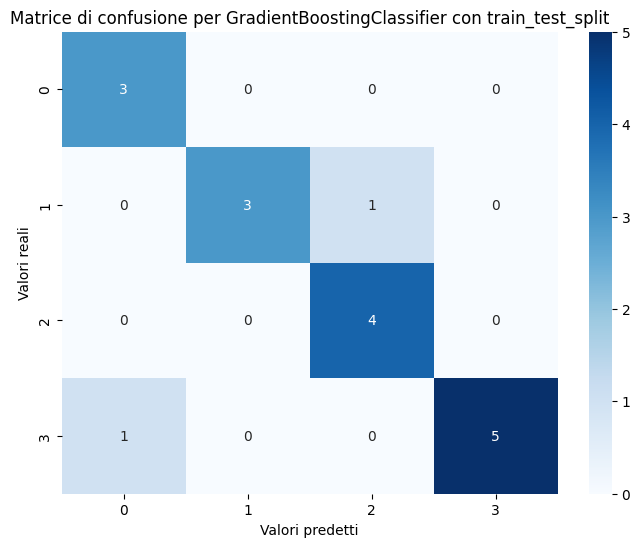

In [338]:
# Creazione e visualizzazione della matrice di confusione per l'algoritmo di boosting GradientBoostingClassifier con train_test_split
matrice_di_confusione_gbc_tts = confusion_matrix(y_test, y_pred_gbc_tts)                    # Realizzazione della matrice di confusione confrontando i test e le predizioni sulla y
plt.figure(figsize=(8,6))                 # Realizzazione del grafico che conterrà la matrice di confusione
sns.heatmap(matrice_di_confusione_gbc_tts, annot=True, fmt='d', cmap='Blues')               # Inserimento della matrice di confusione nel grafico
plt.title('Matrice di confusione per GradientBoostingClassifier con train_test_split')      # Inserimento del titolo del grafico
plt.xlabel('Valori predetti')             # Inserimento dell'etichetta per i valori sull'asse x del grafico
plt.ylabel('Valori reali')                # Inserimento dell'etichetta per i valori sull'asse y del grafico
plt.show()                                # Visualizzazione della matrice di confusione come grafico

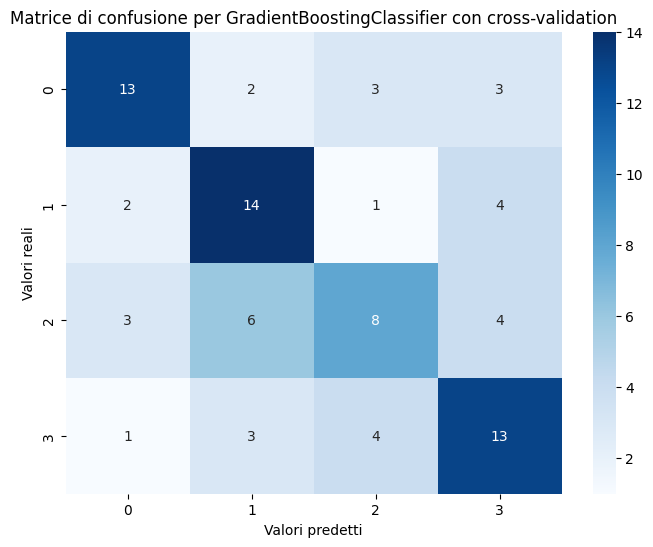

In [339]:
# Creazione e visualizzazione della matrice di confusione per l'algoritmo di boosting GradientBoostingClassifier con cross-validation
matrice_di_confusione_gbc_cv = confusion_matrix(y, y_pred_gbc_cv)                           # Realizzazione della matrice di confusione confrontando i test e le predizioni sulla y
plt.figure(figsize=(8,6))                 # Realizzazione del grafico che conterrà la matrice di confusione
sns.heatmap(matrice_di_confusione_gbc_cv, annot=True, fmt='d', cmap='Blues')                # Inserimento della matrice di confusione nel grafico
plt.title('Matrice di confusione per GradientBoostingClassifier con cross-validation')      # Inserimento del titolo del grafico
plt.xlabel('Valori predetti')             # Inserimento dell'etichetta per i valori sull'asse x del grafico
plt.ylabel('Valori reali')                # Inserimento dell'etichetta per i valori sull'asse y del grafico
plt.show()                                # Visualizzazione della matrice di confusione come grafico

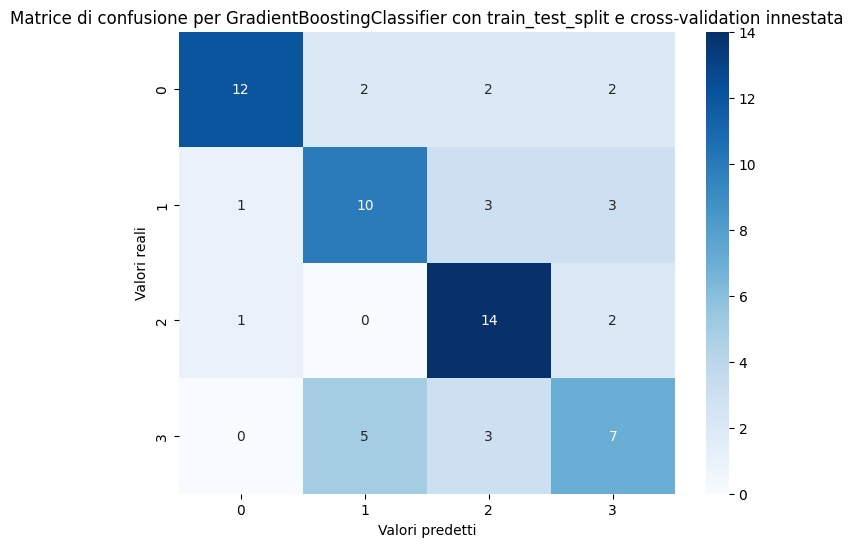

In [340]:
# Creazione e visualizzazione della matrice di confusione per l'algoritmo di boosting GradientBoostingClassifier con train_test_split e cross-validation innestata
matrice_di_confusione_gbc_tts_cv = confusion_matrix(y_train, y_pred_gbc_tts_cv)             # Realizzazione della matrice di confusione confrontando i test e le predizioni sulla y
plt.figure(figsize=(8,6))                 # Realizzazione del grafico che conterrà la matrice di confusione
sns.heatmap(matrice_di_confusione_gbc_tts_cv, annot=True, fmt='d', cmap='Blues')            # Inserimento della matrice di confusione nel grafico
plt.title('Matrice di confusione per GradientBoostingClassifier con train_test_split e cross-validation innestata')       # Inserimento del titolo del grafico
plt.xlabel('Valori predetti')             # Inserimento dell'etichetta per i valori sull'asse x del grafico
plt.ylabel('Valori reali')                # Inserimento dell'etichetta per i valori sull'asse y del grafico
plt.show()                                # Visualizzazione della matrice di confusione come grafico

### Deviazioni standard

In [341]:
# Visualizzazione dei resoconti sulle principali metriche per l'algoritmo di boosting GradientBoostingClassifier
print('Deviazione standard per GradientBoostingClassifier con train_test_split:', np.std(matrice_di_confusione_gbc_tts))
print('Deviazione standard per GradientBoostingClassifier con cross-validation:', np.std(matrice_di_confusione_gbc_cv))
print('Deviazione standard per GradientBoostingClassifier con train_test_split e cross-validation innestata:', np.std(matrice_di_confusione_gbc_tts_cv))

Deviazione standard per GradientBoostingClassifier con train_test_split: 1.6381678027601445
Deviazione standard per GradientBoostingClassifier con cross-validation: 4.235268586524354
Deviazione standard per GradientBoostingClassifier con train_test_split e cross-validation innestata: 4.17161164899131


### ROC curve

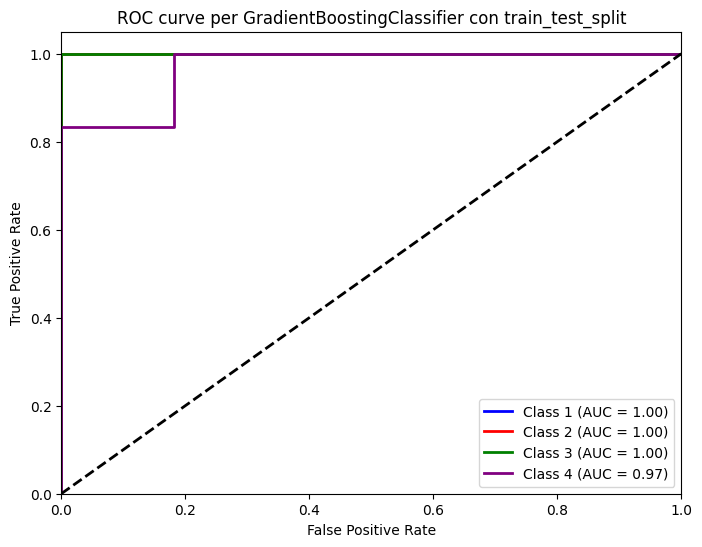

In [342]:
fpr = dict()
tpr = dict()
roc_auc = dict()
y_pred = modello_gbc.predict_proba(X_test)
numero_classi = y_test_binarizzato.shape[1]
for i in range(numero_classi):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarizzato[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure(figsize=(8, 6))
colori = cycle(['blue', 'red', 'green', 'purple'])
for i, colore in zip(range(numero_classi), colori):
    plt.plot(fpr[i], tpr[i], color=colore, lw=2, label=f'Class {i + 1} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve per GradientBoostingClassifier con train_test_split')
plt.legend(loc="lower right")
plt.show()

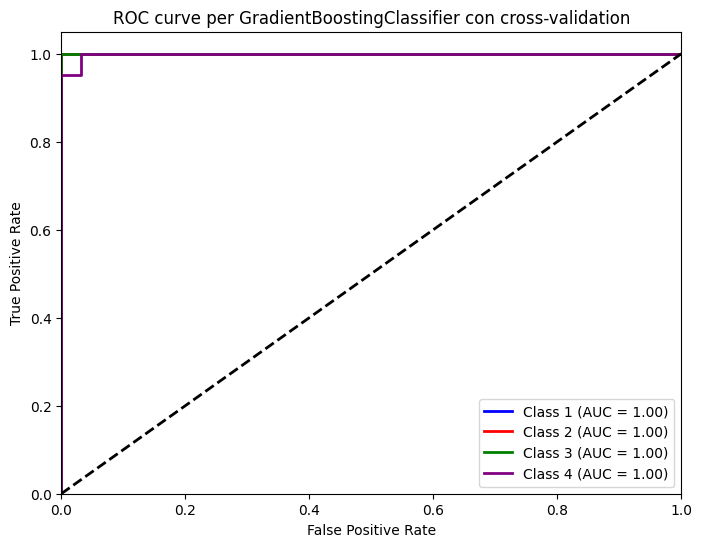

In [343]:
fpr = dict()
tpr = dict()
roc_auc = dict()
y_pred = modello_gbc.predict_proba(X)
numero_classi = y_binarizzato.shape[1]
for i in range(numero_classi):
    fpr[i], tpr[i], _ = roc_curve(y_binarizzato[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure(figsize=(8, 6))
colori = cycle(['blue', 'red', 'green', 'purple'])
for i, colore in zip(range(numero_classi), colori):
    plt.plot(fpr[i], tpr[i], color=colore, lw=2, label=f'Class {i + 1} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve per GradientBoostingClassifier con cross-validation')
plt.legend(loc="lower right")
plt.show()

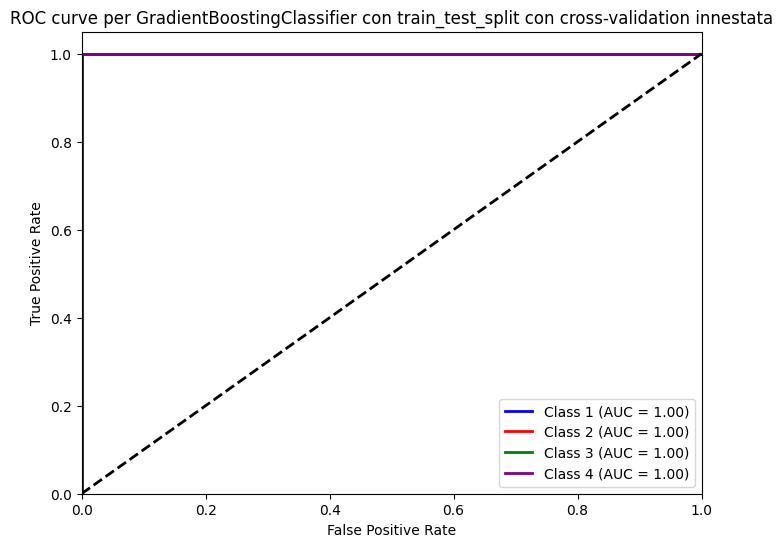

In [344]:
fpr = dict()
tpr = dict()
roc_auc = dict()
y_pred = modello_gbc.predict_proba(X_train)
numero_classi = y_train_binarizzato.shape[1]
for i in range(numero_classi):
    fpr[i], tpr[i], _ = roc_curve(y_train_binarizzato[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure(figsize=(8, 6))
colori = cycle(['blue', 'red', 'green', 'purple'])
for i, colore in zip(range(numero_classi), colori):
    plt.plot(fpr[i], tpr[i], color=colore, lw=2, label=f'Class {i + 1} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve per GradientBoostingClassifier con train_test_split con cross-validation innestata')
plt.legend(loc="lower right")
plt.show()

### Classification report

In [345]:
# Visualizzazione dei resoconti sulle principali metriche per l'algoritmo di boosting GradientBoostingClassifier con train_test_split e cross-validation
print('Classification report per GradientBoostingClassifier con train_test_split\n', classification_report(y_test, y_pred_gbc_tts))
print('Classification report per GradientBoostingClassifier con cross-validation\n', classification_report(y, y_pred_gbc_cv))
print('Classification report per GradientBoostingClassifier con\ntrain_test_split e cross-validation innestata\n', classification_report(y_train, y_pred_gbc_tts_cv))

Classification report per GradientBoostingClassifier con train_test_split
               precision    recall  f1-score   support

           1       0.75      1.00      0.86         3
           2       1.00      0.75      0.86         4
           3       0.80      1.00      0.89         4
           4       1.00      0.83      0.91         6

    accuracy                           0.88        17
   macro avg       0.89      0.90      0.88        17
weighted avg       0.91      0.88      0.88        17

Classification report per GradientBoostingClassifier con cross-validation
               precision    recall  f1-score   support

           1       0.68      0.62      0.65        21
           2       0.56      0.67      0.61        21
           3       0.50      0.38      0.43        21
           4       0.54      0.62      0.58        21

    accuracy                           0.57        84
   macro avg       0.57      0.57      0.57        84
weighted avg       0.57      0.57  

# Boosting - Classificazione con LGBMClassifier

In [346]:
!pip install lightgbm                           # Libreria per l'utilizzo dell'algoritmo di boosting LGBMClassifier
from lightgbm import LGBMClassifier

### Grid search

In [347]:
parametri_lgbmc = {'learning_rate': [0.001, 0.01, 0.1, 1], 'n_estimators': [50, 100, 500, 1000], 'verbose': [-1]}       # Iperparametri di cui effettuare la grid search
grid_search_lgbmc = GridSearchCV(LGBMClassifier(), parametri_lgbmc, cv=6, error_score='raise')                          # Esecuzione della grid search con LGBMClassifier
grid_search_lgbmc.fit(X_train, y_train)                         # Svolgimento del fitting della grid search sui dati di train per trovare la migliore combinazione di iperparametri
migliori_parametri_lgbmc = grid_search_lgbmc.best_params_       # Salvataggio dei migliori iperparametri per il processo di fitting effettuato sopra
print('Migliore combinazione di iperparametri per LGBMClassifier:', grid_search_lgbmc.best_params_)                     # Visualizzazione della migliore combinazione di iperparametri
print('Migliore accuratezza in fase di grid search per LGBMClassifier:', grid_search_lgbmc.best_score_)                 # Visualizzazione della precisione raggiunta con tale combinazione

Migliore combinazione di iperparametri per LGBMClassifier: {'learning_rate': 0.1, 'n_estimators': 1000, 'verbose': -1}
Migliore accuratezza in fase di grid search per LGBMClassifier: 0.6717171717171717


### LGBMClassifier con train_test_split

In [348]:
modello_lgbmc = LGBMClassifier(**migliori_parametri_lgbmc)            # Utilizzo dell'algoritmo con i migliori iperparametri
modello_lgbmc.fit(X_train, y_train)                                   # Svolgimento del fitting del precedente algoritmo sui dati di train
y_pred_lgbmc_tts = modello_lgbmc.predict(X_test)                      # Calcolo della predizione effettuata dall'algoritmo sui dati di test della X
precisione_lgbmc_tts = accuracy_score(y_test, y_pred_lgbmc_tts)       # Calcolo della precisione dell'algoritmo sui dati di test della y
print('Precisione con train_test_split:', precisione_lgbmc_tts)       # Visualizzazione della precisione dell'algoritmo con train_test_split

Precisione con train_test_split: 0.7647058823529411


### LGBMClassifier con cross-validation

In [349]:
y_pred_lgbmc_cv = cross_val_predict(modello_lgbmc, X, y, cv=6)        # Calcolo della predizione effettuata dall'algoritmo sui dati della X
precisione_lgbmc_cv = accuracy_score(y, y_pred_lgbmc_cv)              # Calcolo della precisione dell'algoritmo con X e y divisi in 6 gruppi da 14 righe di dati l'uno
print('Precisione con cross-validation:', precisione_lgbmc_cv)        # Visualizzazione della precisione dell'algoritmo con cross-validation

Precisione con cross-validation: 0.6190476190476191


### LGBMClassifier con train_test_split e cross-validation innestata

In [350]:
y_pred_lgbmc_tts_cv = cross_val_predict(modello_lgbmc, X_train, y_train, cv=6)                        # Calcolo della predizione effettuata dall'algoritmo sui dati della X
precisione_lgbmc_tts_cv = accuracy_score(y_train, y_pred_lgbmc_tts_cv)                                # Calcolo della precisione dell'algoritmo con X e y divisi in 6 gruppi da 14 righe di dati l'uno
print('Precisione con train_test_split e cross-validation innestata:', precisione_lgbmc_tts_cv)       # Visualizzazione della precisione dell'algoritmo con cross-validation

Precisione con train_test_split e cross-validation innestata: 0.6716417910447762


### Matrici di confusione

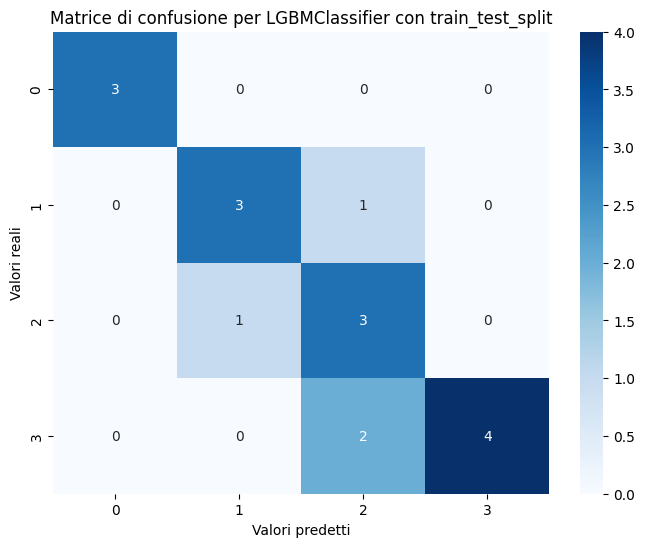

In [351]:
# Creazione e visualizzazione della matrice di confusione per l'algoritmo di boosting LGBMClassifier con train_test_split
matrice_di_confusione_lgbmc_tts = confusion_matrix(y_test, y_pred_lgbmc_tts)          # Realizzazione della matrice di confusione confrontando i test e le predizioni sulla y
plt.figure(figsize=(8,6))                 # Realizzazione del grafico che conterrà la matrice di confusione
sns.heatmap(matrice_di_confusione_lgbmc_tts, annot=True, fmt='d', cmap='Blues')       # Inserimento della matrice di confusione nel grafico
plt.title('Matrice di confusione per LGBMClassifier con train_test_split')            # Inserimento del titolo del grafico
plt.xlabel('Valori predetti')             # Inserimento dell'etichetta per i valori sull'asse x del grafico
plt.ylabel('Valori reali')                # Inserimento dell'etichetta per i valori sull'asse y del grafico
plt.show()                                # Visualizzazione della matrice di confusione come grafico

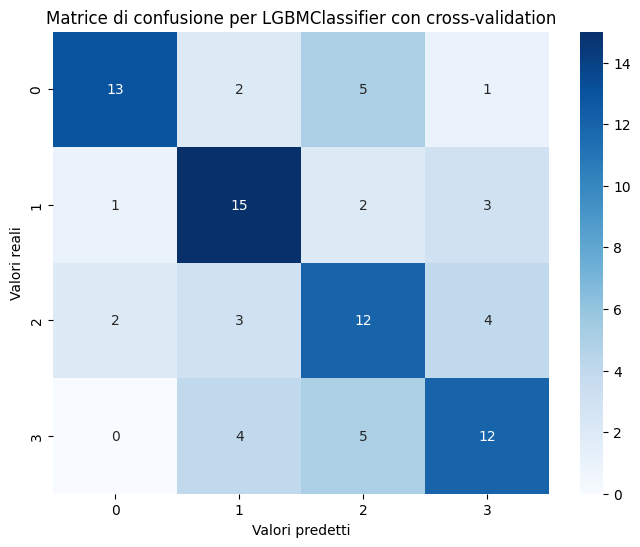

In [352]:
# Creazione e visualizzazione della matrice di confusione per l'algoritmo di boosting LGBMClassifier con train_test_split
matrice_di_confusione_lgbmc_cv = confusion_matrix(y, y_pred_lgbmc_cv)                 # Realizzazione della matrice di confusione confrontando i test e le predizioni sulla y
plt.figure(figsize=(8,6))                 # Realizzazione del grafico che conterrà la matrice di confusione
sns.heatmap(matrice_di_confusione_lgbmc_cv, annot=True, fmt='d', cmap='Blues')        # Inserimento della matrice di confusione nel grafico
plt.title('Matrice di confusione per LGBMClassifier con cross-validation')            # Inserimento del titolo del grafico
plt.xlabel('Valori predetti')             # Inserimento dell'etichetta per i valori sull'asse x del grafico
plt.ylabel('Valori reali')                # Inserimento dell'etichetta per i valori sull'asse y del grafico
plt.show()                                # Visualizzazione della matrice di confusione come grafico

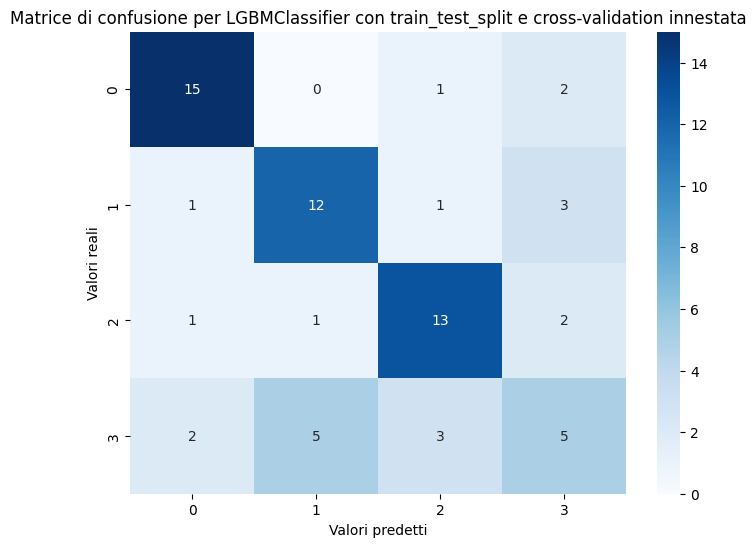

In [353]:
# Creazione e visualizzazione della matrice di confusione per l'algoritmo di boosting LGBMClassifier con train_test_split e cross-validation innestata
matrice_di_confusione_lgbmc_tts_cv = confusion_matrix(y_train, y_pred_lgbmc_tts_cv)   # Realizzazione della matrice di confusione confrontando i test e le predizioni sulla y
plt.figure(figsize=(8,6))                 # Realizzazione del grafico che conterrà la matrice di confusione
sns.heatmap(matrice_di_confusione_lgbmc_tts_cv, annot=True, fmt='d', cmap='Blues')    # Inserimento della matrice di confusione nel grafico
plt.title('Matrice di confusione per LGBMClassifier con train_test_split e cross-validation innestata')       # Inserimento del titolo del grafico
plt.xlabel('Valori predetti')             # Inserimento dell'etichetta per i valori sull'asse x del grafico
plt.ylabel('Valori reali')                # Inserimento dell'etichetta per i valori sull'asse y del grafico
plt.show()                                # Visualizzazione della matrice di confusione come grafico

### Deviazioni standard

In [354]:
# Visualizzazione dei resoconti sulle principali metriche per l'algoritmo di boosting LGBMClassifier con train_test_split e cross-validation
print('Deviazione standard per LGBMClassifier con train_test_split:', np.std(matrice_di_confusione_lgbmc_tts))
print('Deviazione standard per LGBMClassifier con cross-validation:', np.std(matrice_di_confusione_lgbmc_cv))
print('Deviazione standard per LGBMClassifier con train_test_split e cross-validation innestata:', np.std(matrice_di_confusione_lgbmc_tts_cv))

Deviazione standard per LGBMClassifier con train_test_split: 1.3905372163304368
Deviazione standard per LGBMClassifier con cross-validation: 4.710360920354193
Deviazione standard per LGBMClassifier con train_test_split e cross-validation innestata: 4.626266718424263


### ROC curve

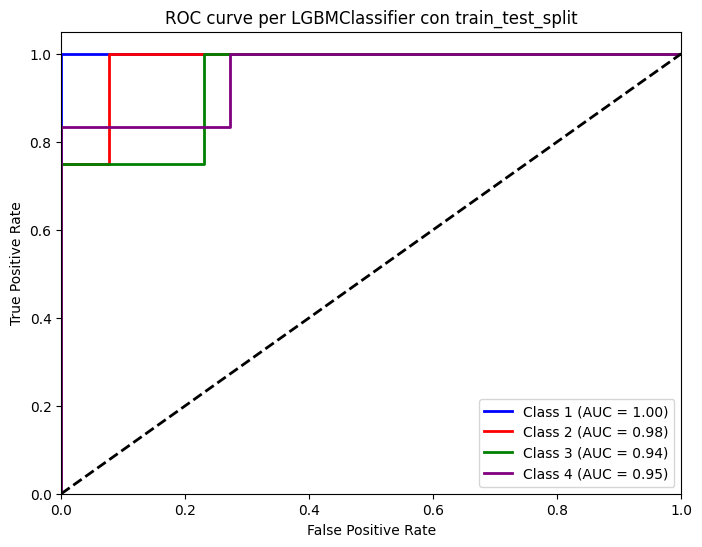

In [355]:
fpr = dict()
tpr = dict()
roc_auc = dict()
y_pred = modello_lgbmc.predict_proba(X_test)
numero_classi = y_test_binarizzato.shape[1]
for i in range(numero_classi):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarizzato[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure(figsize=(8, 6))
colori = cycle(['blue', 'red', 'green', 'purple'])
for i, colore in zip(range(numero_classi), colori):
    plt.plot(fpr[i], tpr[i], color=colore, lw=2, label=f'Class {i + 1} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve per LGBMClassifier con train_test_split')
plt.legend(loc="lower right")
plt.show()

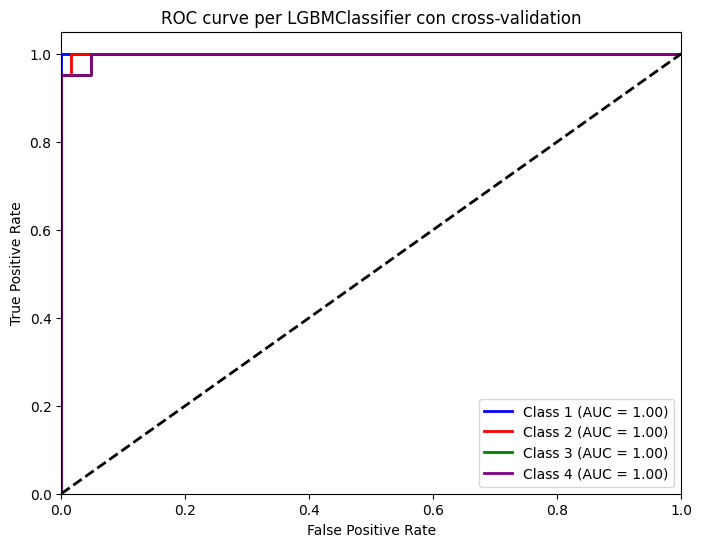

In [356]:
fpr = dict()
tpr = dict()
roc_auc = dict()
y_pred = modello_lgbmc.predict_proba(X)
numero_classi = y_binarizzato.shape[1]
for i in range(numero_classi):
    fpr[i], tpr[i], _ = roc_curve(y_binarizzato[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure(figsize=(8, 6))
colori = cycle(['blue', 'red', 'green', 'purple'])
for i, colore in zip(range(numero_classi), colori):
    plt.plot(fpr[i], tpr[i], color=colore, lw=2, label=f'Class {i + 1} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve per LGBMClassifier con cross-validation')
plt.legend(loc="lower right")
plt.show()

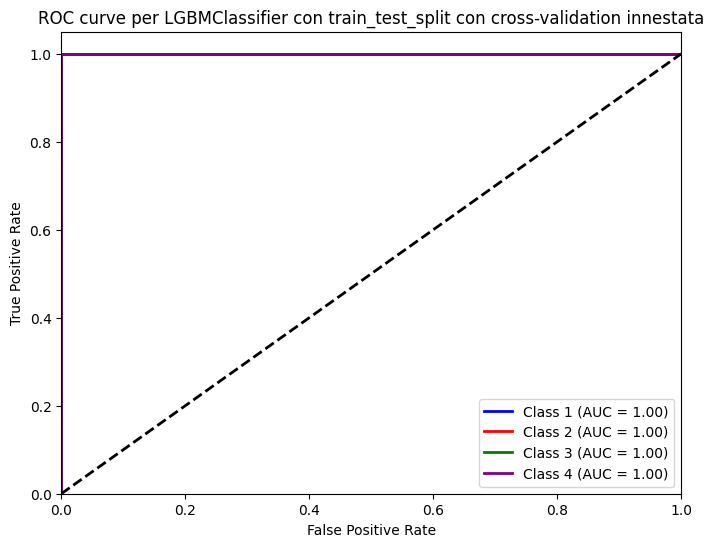

In [357]:
fpr = dict()      # Calcola la curva ROC per ciascuna classe
tpr = dict()
roc_auc = dict()
y_pred = modello_lgbmc.predict_proba(X_train)
numero_classi = y_train_binarizzato.shape[1]
for i in range(numero_classi):
    fpr[i], tpr[i], _ = roc_curve(y_train_binarizzato[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure(figsize=(8, 6))      # Plotta la curva ROC per ciascuna classe
colori = cycle(['blue', 'red', 'green', 'purple'])
for i, colore in zip(range(numero_classi), colori):
    plt.plot(fpr[i], tpr[i], color=colore, lw=2, label=f'Class {i + 1} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)       # Impostazioni del grafico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve per LGBMClassifier con train_test_split con cross-validation innestata')
plt.legend(loc="lower right")
plt.show()

### Classification report

In [358]:
# Visualizzazione dei resoconti sulle principali metriche per l'algoritmo di boosting LGBMClassifier con train_test_split e cross-validation
print('Classification report per LGBMClassifier con train_test_split\n', classification_report(y_test, y_pred_lgbmc_tts))
print('Classification report per LGBMClassifier con cross-validation\n', classification_report(y, y_pred_lgbmc_cv))
print('Classification report per LGBMClassifier con\ntrain_test_split e cross-validation innestata\n', classification_report(y_train, y_pred_lgbmc_tts_cv))

Classification report per LGBMClassifier con train_test_split
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       0.75      0.75      0.75         4
           3       0.50      0.75      0.60         4
           4       1.00      0.67      0.80         6

    accuracy                           0.76        17
   macro avg       0.81      0.79      0.79        17
weighted avg       0.82      0.76      0.78        17

Classification report per LGBMClassifier con cross-validation
               precision    recall  f1-score   support

           1       0.81      0.62      0.70        21
           2       0.62      0.71      0.67        21
           3       0.50      0.57      0.53        21
           4       0.60      0.57      0.59        21

    accuracy                           0.62        84
   macro avg       0.63      0.62      0.62        84
weighted avg       0.63      0.62      0.62        84

Clas

# Boosting - Classificazione con CatBoostClassifier

In [359]:
!pip install catboost                           # Libreria per l'utilizzo dell'algoritmo di boosting CatBoostClassifier
from catboost import CatBoostClassifier

### Grid search

In [360]:
parametri_cbc = {'learning_rate': [0.001, 0.01, 0.1, 1], 'n_estimators': [50, 100, 500, 1000], 'verbose': [False]}      # Iperparametri di cui effettuare la grid search
grid_search_cbc = GridSearchCV(CatBoostClassifier(), parametri_cbc, cv=6, error_score='raise')                          # Esecuzione della grid search con CatBoostClassifier
grid_search_cbc.fit(X_train, y_train)                       # Svolgimento del fitting della grid search sui dati di train per trovare la migliore combinazione di iperparametri
migliori_parametri_cbc = grid_search_cbc.best_params_       # Salvataggio dei migliori iperparametri per il processo di fitting effettuato sopra
print('Migliore combinazione di iperparametri per CatBoostClassifier:', grid_search_cbc.best_params_)                   # Visualizzazione della migliore combinazione di iperparametri
print('Migliore accuratezza in fase di grid search per CatBoostClassifier:', grid_search_cbc.best_score_)               # Visualizzazione della precisione raggiunta con tale combinazione

Migliore combinazione di iperparametri per CatBoostClassifier: {'learning_rate': 0.1, 'n_estimators': 500, 'verbose': False}
Migliore accuratezza in fase di grid search per CatBoostClassifier: 0.6578282828282828


### CatBoostClassifier con train_test_split

In [361]:
modello_cbc = CatBoostClassifier(**migliori_parametri_cbc)            # Utilizzo dell'algoritmo con i migliori iperparametri
modello_cbc.fit(X_train, y_train)                                     # Svolgimento del fitting del precedente algoritmo sui dati di train
y_pred_cbc_tts = modello_cbc.predict(X_test)                          # Calcolo della predizione effettuata dall'algoritmo sui dati di test della X
precisione_cbc_tts = accuracy_score(y_test, y_pred_cbc_tts)           # Calcolo della precisione dell'algoritmo sui dati di test della y
print('Precisione con train_test_split:', precisione_cbc_tts)         # Visualizzazione della precisione dell'algoritmo con train_test_split

Precisione con train_test_split: 0.7647058823529411


### CatBoostClassifier con cross-validation

In [362]:
y_pred_cbc_cv = cross_val_predict(modello_cbc, X, y, cv=6)            # Calcolo della predizione effettuata dall'algoritmo sui dati della X
precisione_cbc_cv = accuracy_score(y, y_pred_cbc_cv)                  # Calcolo della precisione dell'algoritmo con X e y divisi in 6 gruppi da 14 righe di dati l'uno
print('Precisione con cross-validation:', precisione_cbc_cv)          # Visualizzazione della precisione dell'algoritmo con cross-validation

Precisione con cross-validation: 0.6309523809523809


### CatBoostClassifier con train_test_split e cross-validation innestata

In [363]:
y_pred_cbc_tts_cv = cross_val_predict(modello_cbc, X_train, y_train, cv=6)                            # Calcolo della predizione effettuata dall'algoritmo sui dati della X
precisione_cbc_tts_cv = accuracy_score(y_train, y_pred_cbc_tts_cv)                                    # Calcolo della precisione dell'algoritmo con X e y divisi in 6 gruppi da 14 righe di dati l'uno
print('Precisione con train_test_split e cross-validation innestata:', precisione_cbc_tts_cv)         # Visualizzazione della precisione dell'algoritmo con cross-validation

Precisione con train_test_split e cross-validation innestata: 0.6567164179104478


### Matrici di confusione

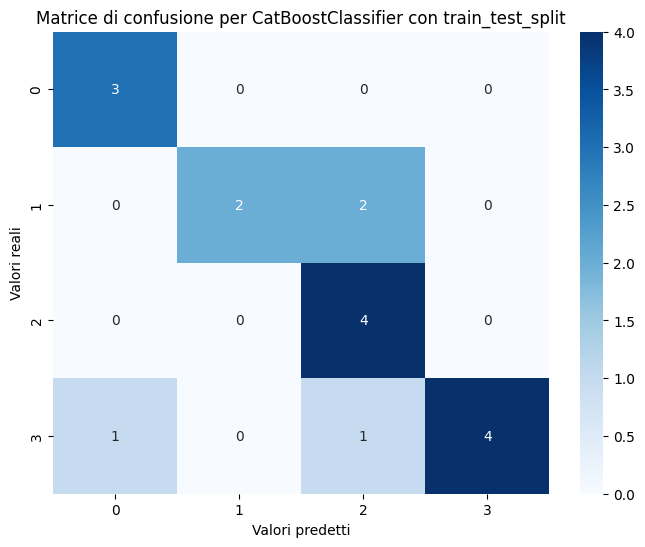

In [364]:
# Creazione e visualizzazione della matrice di confusione per l'algoritmo di boosting CatBoostClassifier con train_test_split
matrice_di_confusione_cbc_tts = confusion_matrix(y_test, y_pred_cbc_tts)            # Realizzazione della matrice di confusione confrontando i test e le predizioni sulla y
plt.figure(figsize=(8,6))                 # Realizzazione del grafico che conterrà la matrice di confusione
sns.heatmap(matrice_di_confusione_cbc_tts, annot=True, fmt='d', cmap='Blues')       # Inserimento della matrice di confusione nel grafico
plt.title('Matrice di confusione per CatBoostClassifier con train_test_split')      # Inserimento del titolo del grafico
plt.xlabel('Valori predetti')             # Inserimento dell'etichetta per i valori sull'asse x del grafico
plt.ylabel('Valori reali')                # Inserimento dell'etichetta per i valori sull'asse y del grafico
plt.show()                                # Visualizzazione della matrice di confusione come grafico

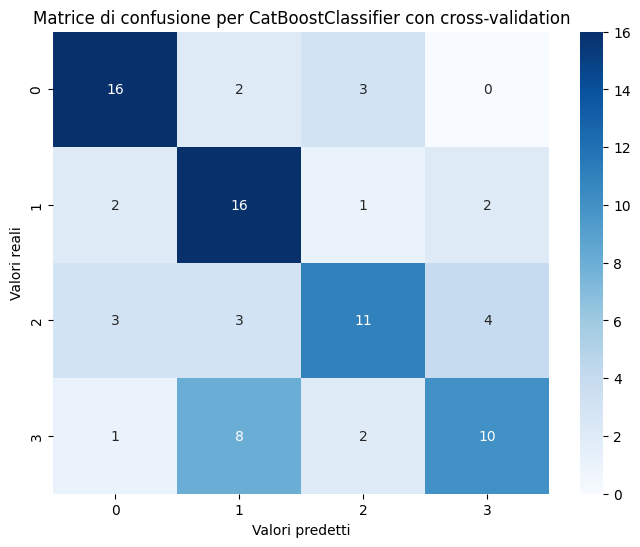

In [365]:
# Creazione e visualizzazione della matrice di confusione per l'algoritmo di boosting CatBoostClassifier con train_test_split
matrice_di_confusione_cbc_cv = confusion_matrix(y, y_pred_cbc_cv)                   # Realizzazione della matrice di confusione confrontando i test e le predizioni sulla y
plt.figure(figsize=(8,6))                 # Realizzazione del grafico che conterrà la matrice di confusione
sns.heatmap(matrice_di_confusione_cbc_cv, annot=True, fmt='d', cmap='Blues')        # Inserimento della matrice di confusione nel grafico
plt.title('Matrice di confusione per CatBoostClassifier con cross-validation')      # Inserimento del titolo del grafico
plt.xlabel('Valori predetti')             # Inserimento dell'etichetta per i valori sull'asse x del grafico
plt.ylabel('Valori reali')                # Inserimento dell'etichetta per i valori sull'asse y del grafico
plt.show()                                # Visualizzazione della matrice di confusione come grafico

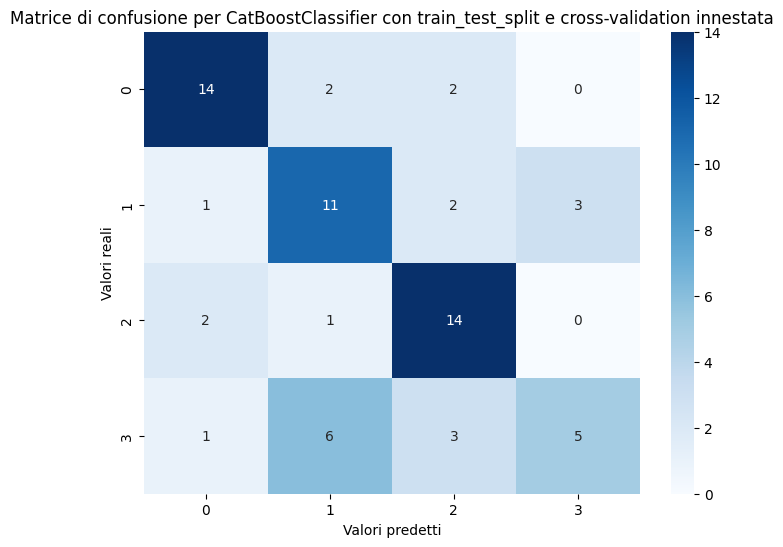

In [366]:
# Creazione e visualizzazione della matrice di confusione per l'algoritmo di boosting CatBoostClassifier con train_test_split e cross-validation innestata
matrice_di_confusione_cbc_tts_cv = confusion_matrix(y_train, y_pred_cbc_tts_cv)     # Realizzazione della matrice di confusione confrontando i test e le predizioni sulla y
plt.figure(figsize=(8,6))                 # Realizzazione del grafico che conterrà la matrice di confusione
sns.heatmap(matrice_di_confusione_cbc_tts_cv, annot=True, fmt='d', cmap='Blues')    # Inserimento della matrice di confusione nel grafico
plt.title('Matrice di confusione per CatBoostClassifier con train_test_split e cross-validation innestata')       # Inserimento del titolo del grafico
plt.xlabel('Valori predetti')             # Inserimento dell'etichetta per i valori sull'asse x del grafico
plt.ylabel('Valori reali')                # Inserimento dell'etichetta per i valori sull'asse y del grafico
plt.show()                                # Visualizzazione della matrice di confusione come grafico

### Deviazioni standard

In [367]:
# Visualizzazione dei resoconti sulle principali metriche per l'algoritmo di boosting CatBoostClassifier con train_test_split e cross-validation
print('Deviazione standard per CatBoostClassifier con train_test_split:', np.std(matrice_di_confusione_cbc_tts))
print('Deviazione standard per CatBoostClassifier con cross-validation:', np.std(matrice_di_confusione_cbc_cv))
print('Deviazione standard per CatBoostClassifier con train_test_split e cross-validation innestata:', np.std(matrice_di_confusione_cbc_tts_cv))

Deviazione standard per CatBoostClassifier con train_test_split: 1.4347800354061246
Deviazione standard per CatBoostClassifier con cross-validation: 5.105144464165535
Deviazione standard per CatBoostClassifier con train_test_split e cross-validation innestata: 4.544484981821372


### ROC curve

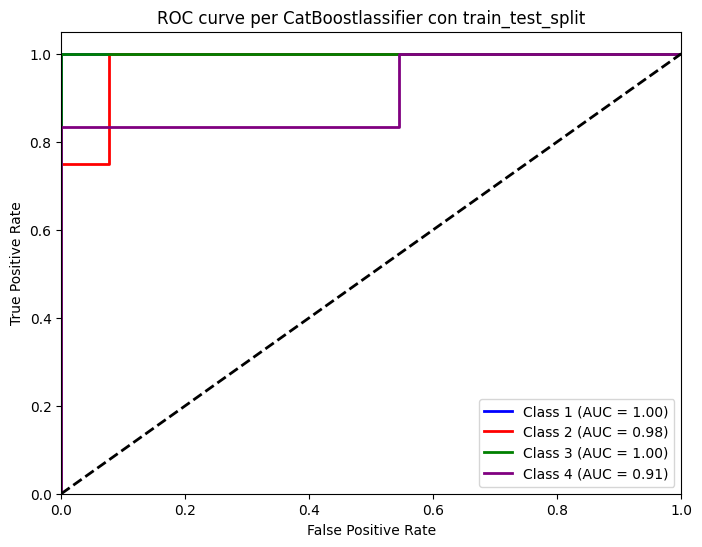

In [368]:
fpr = dict()
tpr = dict()
roc_auc = dict()
y_pred = modello_cbc.predict_proba(X_test)
numero_classi = y_test_binarizzato.shape[1]
for i in range(numero_classi):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarizzato[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure(figsize=(8, 6))
colori = cycle(['blue', 'red', 'green', 'purple'])
for i, colore in zip(range(numero_classi), colori):
    plt.plot(fpr[i], tpr[i], color=colore, lw=2, label=f'Class {i + 1} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve per CatBoostlassifier con train_test_split')
plt.legend(loc="lower right")
plt.show()

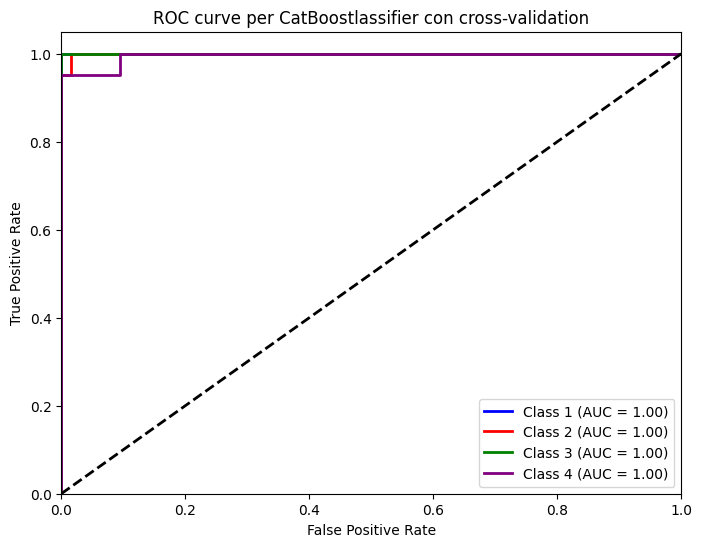

In [369]:
fpr = dict()
tpr = dict()
roc_auc = dict()
y_pred = modello_cbc.predict_proba(X)
numero_classi = y_binarizzato.shape[1]
for i in range(numero_classi):
    fpr[i], tpr[i], _ = roc_curve(y_binarizzato[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure(figsize=(8, 6))
colori = cycle(['blue', 'red', 'green', 'purple'])
for i, colore in zip(range(numero_classi), colori):
    plt.plot(fpr[i], tpr[i], color=colore, lw=2, label=f'Class {i + 1} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve per CatBoostlassifier con cross-validation')
plt.legend(loc="lower right")
plt.show()

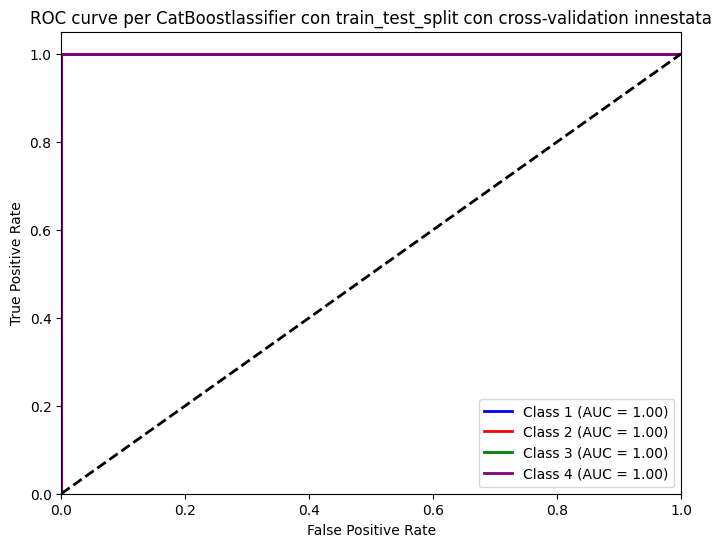

In [370]:
fpr = dict()
tpr = dict()
roc_auc = dict()
y_pred = modello_cbc.predict_proba(X_train)
numero_classi = y_train_binarizzato.shape[1]
for i in range(numero_classi):
    fpr[i], tpr[i], _ = roc_curve(y_train_binarizzato[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure(figsize=(8, 6))
colori = cycle(['blue', 'red', 'green', 'purple'])
for i, colore in zip(range(numero_classi), colori):
    plt.plot(fpr[i], tpr[i], color=colore, lw=2, label=f'Class {i + 1} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve per CatBoostlassifier con train_test_split con cross-validation innestata')
plt.legend(loc="lower right")
plt.show()

### Classification report

In [371]:
# Visualizzazione dei resoconti sulle principali metriche per l'algoritmo di boosting CatBoostClassifier con train_test_split e cross-validation
print('Classification report per CatBoostClassifier con train_test_split\n', classification_report(y_test, y_pred_cbc_tts))
print('Classification report per CatBoostClassifier con cross-validation\n', classification_report(y, y_pred_cbc_cv))
print('Classification report per CatBoostClassifier con\ntrain_test_split e cross-validation innestata\n', classification_report(y_train, y_pred_cbc_tts_cv))

Classification report per CatBoostClassifier con train_test_split
               precision    recall  f1-score   support

           1       0.75      1.00      0.86         3
           2       1.00      0.50      0.67         4
           3       0.57      1.00      0.73         4
           4       1.00      0.67      0.80         6

    accuracy                           0.76        17
   macro avg       0.83      0.79      0.76        17
weighted avg       0.86      0.76      0.76        17

Classification report per CatBoostClassifier con cross-validation
               precision    recall  f1-score   support

           1       0.73      0.76      0.74        21
           2       0.55      0.76      0.64        21
           3       0.65      0.52      0.58        21
           4       0.62      0.48      0.54        21

    accuracy                           0.63        84
   macro avg       0.64      0.63      0.63        84
weighted avg       0.64      0.63      0.63        